In [1]:
from qcodes_contrib_drivers.drivers.Sirah.Matisse import *
from qcodes.loops import Loop
import visa
from qcodes.dataset.plotting import plot_dataset
import time

In [2]:
rm = visa.ResourceManager()

rm.list_resources()

('USB0::0x17E7::0x0101::15-25-15::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

In [ ]:
vinstr = rm.open_resource("USB0::0x17E7::0x0101::15-25-15::INSTR")

In [ ]:
vinstr.query("MOTBI:CL")

In [ ]:
vinstr.query("MOTTE:CL")

In [ ]:
vinstr.query("ERR:CL")

In [ ]:
vinstr.query("IDN?")

In [ ]:
vinstr.query("MOTBI:STA?")

In [ ]:
vinstr.close()

In [3]:
instr = SirahMatisse("matisse", "USB0::0x17E7::0x0101::15-25-15::INSTR")

Connected to: Sirah "Matisse TR (serial:15-25-15, firmware:1.13) in 0.03s


In [4]:
instr.error_codes()

[]

In [5]:
instr.error_clear()

In [6]:
instr.IDN()

{'vendor': 'Sirah',
 'model': '"Matisse TR',
 'serial': '15-25-15',
 'firmware': '1.13',
 'board': '01.01',
 'date': 'Jan 27 2015"'}

In [7]:
instr.motor_bifi.position()

97000

In [ ]:
instr.motor_bifi.position(98000)

In [8]:
# Sweep position from 97000 to 99000 in steps of 50

# Following line doesn't work because sweep-fucntion generates floats instead of ints:
# loop = Loop(instr.bifi.position.sweep(95000, 100000, step=50)).each(...)

# Instead use a range
rng = range(97000, 99000, 50)
loop = Loop(instr.motor_bifi.position[rng]).each(instr.motor_bifi.position, instr.power_diode.dc_value, instr.thin_etalon.dc_value)

In [9]:
# Run sweep

# There will be a problem running the sweep, because setting the position
# doesn't wait until the position is reached. Need to do something to prevent
# this... (maybe there is a wait-command or poll the position by hand, e.g. poll status != idle)

data = loop.run()

Started at 2020-10-26 15:39:30
DataSet:
   location = 'data/2020-10-26/#012_{name}_15-39-30'
   <Type>   | <array_id>                      | <array.name> | <array.shape>
   Setpoint | matisse_motor_bifi_position_set | position     | (40,)
   Measured | matisse_motor_bifi_position     | position     | (40,)
   Measured | matisse_power_diode_dc_value    | dc_value     | (40,)
   Measured | matisse_thin_etalon_dc_value    | dc_value     | (40,)
Finished at 2020-10-26 15:39:39


In [10]:
data

DataSet:
   location = 'data/2020-10-26/#012_{name}_15-39-30'
   <Type>   | <array_id>                      | <array.name> | <array.shape>
   Setpoint | matisse_motor_bifi_position_set | position     | (40,)
   Measured | matisse_motor_bifi_position     | position     | (40,)
   Measured | matisse_power_diode_dc_value    | dc_value     | (40,)
   Measured | matisse_thin_etalon_dc_value    | dc_value     | (40,)

In [11]:
# Here you will see that sweeping is faster than setting the position
print("POSITION SET", "\t", "MEASURED POS", "\t", "POWER DIODE", "\t", "THIN ETALON REFLEX")
for i, setpoint in enumerate(data.matisse_motor_bifi_position_set):
    print(setpoint, "\t", data.matisse_motor_bifi_position[i], "\t", data.matisse_power_diode_dc_value[i], "\t", data.matisse_thin_etalon_dc_value[i])

POSITION SET 	 MEASURED POS 	 POWER DIODE 	 THIN ETALON REFLEX
97000.0 	 97000.0 	 0.0078125 	 0.0078125
97050.0 	 97050.0 	 0.008789063 	 0.0078125
97100.0 	 97100.0 	 0.0078125 	 0.0078125
97150.0 	 97150.0 	 0.0078125 	 0.0078125
97200.0 	 97200.0 	 0.008789063 	 0.006835938
97250.0 	 97250.0 	 0.0078125 	 0.0078125
97300.0 	 97300.0 	 0.0078125 	 0.006835938
97350.0 	 97350.0 	 0.008789063 	 0.0078125
97400.0 	 97400.0 	 0.0078125 	 0.0078125
97450.0 	 97450.0 	 0.0078125 	 0.0078125
97500.0 	 97500.0 	 0.008789063 	 0.0078125
97550.0 	 97550.0 	 0.0078125 	 0.0078125
97600.0 	 97600.0 	 0.0078125 	 0.0078125
97650.0 	 97650.0 	 0.0078125 	 0.008789063
97700.0 	 97700.0 	 0.0078125 	 0.006835938
97750.0 	 97750.0 	 0.0078125 	 0.008789063
97800.0 	 97800.0 	 0.0078125 	 0.0078125
97850.0 	 97850.0 	 0.008789063 	 0.0078125
97900.0 	 97900.0 	 0.0078125 	 0.0078125
97950.0 	 97950.0 	 0.0078125 	 0.006835938
98000.0 	 98000.0 	 0.0078125 	 0.008789063
98050.0 	 98050.0 	 0.0078125 	

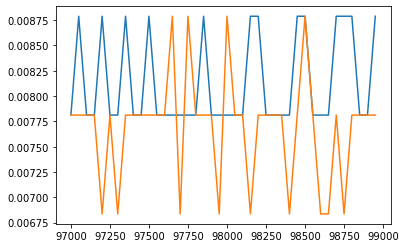

In [12]:
import matplotlib.pyplot as plt

x = data.matisse_motor_bifi_position_set
y_list = [data.matisse_power_diode_dc_value, data.matisse_thin_etalon_dc_value]

for y in y_list:
    plt.plot(x, y)

In [13]:
instr.close()